**Question 1 :** Test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are
independent from the country. Please state which is/are the null hypothesis of your test(s).

In [2]:
# Libraries
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import os

In [4]:
# load data 
df = pd.read_csv('/content/EFIplus_medit (3).zip',compression='zip', sep=";")


**The chi-squared test of independence** is an appropriate statistical test to use when we want to determine if there is a relationship between two categorical variables. In this case, we have two categorical variables: the presence or absence of Salmo trutta fario (Brown Trout) and the country.

In [6]:
# create two-dimensional array
arr = np.array([df['Country'], df['Salmo trutta fario']]).T

# create contingency table
table = np.zeros((len(np.unique(arr[:, 0])), len(np.unique(arr[:, 1]))))
for row in arr:
    table[np.where(np.unique(arr[:, 0]) == row[0]), np.where(np.unique(arr[:, 1]) == row[1])] += 1

# perform chi-square test
chi2, p, dof, expected = sts.chi2_contingency(table)
# interpret test result
alpha = 0.05
if p <= alpha:
    print('Reject null hypothesis. Variables are dependent.')
else:
    print('Fail to reject null hypothesis. Variables are independent.')

Reject null hypothesis. Variables are dependent.


**Question 2 :** Test whether the means (or medians) of “Actual_river_slope” between presence and absence sites of
Salmo trutta fario (Brown Trout) are equal using an appropriate test. Please state which is/are the null
hypothesis of your test(s).


4.05 10.7
t-stat=439968.000, p-value=0.000
reject H0 that median values are equal


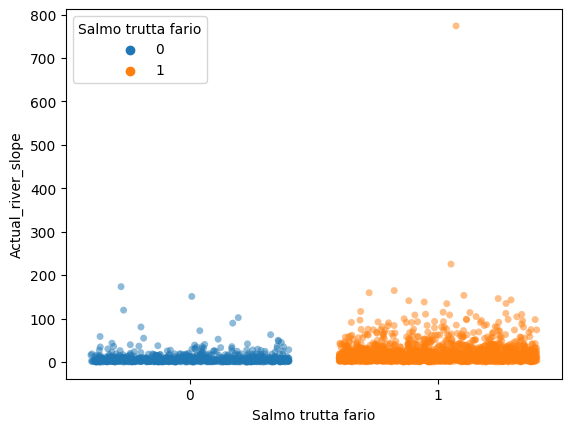

In [18]:
# create dataframes for presence and absence sites
df2 = df.dropna()
data = df2[['Salmo trutta fario','Actual_river_slope']]
sample0 = df2[df2['Salmo trutta fario']==0]['Actual_river_slope']
sample1 = df2[df2['Salmo trutta fario']==1]['Actual_river_slope']
sns.stripplot(data, x='Salmo trutta fario', y='Actual_river_slope', hue='Salmo trutta fario', jitter=.4, alpha=.5)
# sample median
med_0 = sample0.median()
med_1 = sample1.median()
print (med_0,med_1)
# perform Mann-Whitney-U-test (the data is not normally distributed and it is right-skewed)
stat, p = sts.mannwhitneyu(sample0, sample1, alternative='two-sided')
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
# interpret test result
alpha = 0.05
if p <= alpha:
 print('reject H0 that median values are equal')
else:
 print('fail to reject H0')

**Question 3 :** Test whether there are diferences in the mean elevation in the upstream catchment (ELEV_MN_du)
among the four most sampled catchments. For which pairs of catchments are these diferences
significant? Please state which is/are the null hypothesis of your test(s).

In [27]:
# The 4 most sampled catchments
df= df.dropna()
most_sampled_catchments = df.groupby(['Catchment_name'])['Site_code'].count().sort_values(ascending=False).head(4).index
print(most_sampled_catchments)

Index(['Galiza-Norte', 'Minho', 'Cantabrica', 'Douro'], dtype='object', name='Catchment_name')


In [29]:
# create a new dataframe with only the four most sampled catchments
new_df = df[df['Catchment_name'].isin(most_sampled_catchments)][['Catchment_name', 'Elevation_mean_catch']]
new_df

,Catchment_name,Elevation_mean_catch
18,Douro,1687.103217
19,Douro,1293.238318
28,Douro,967.398405
32,Douro,1088.329483
43,Douro,985.273741
...,...,...
4542,Minho,543.437735
4543,Minho,543.437735
4544,Minho,532.711662
4545,Minho,427.162835


In [35]:
# Taking samples
sample0 = new_df[new_df['Catchment_name']=='Douro']['Elevation_mean_catch']
sample1 = new_df[new_df['Catchment_name']=='Minho']['Elevation_mean_catch']
sample2 = new_df[new_df['Catchment_name']=='Galiza-Norte']['Elevation_mean_catch']
sample3 = new_df[new_df['Catchment_name']=='Cantabrica']['Elevation_mean_catch']

In [37]:
# perform Kruskal-Walis test
# H0: The population median of all of the groups are equal.
stat, p = sts.kruskal(sample0, sample1, sample2, sample3, nan_policy='propagate', axis=0, keepdims=False)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha = 0.05
if p > alpha: print('population median of all groups is equal (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else: print('population median NOT equal for all groups (reject H0 with an error probability <0.05).')
# print results
print("Kruskal-Walis test results:")
print("F-statistic:", stat)
print("p-value:",  p)

Statistics=661.543, p=0.000
population median NOT equal for all groups (reject H0 with an error probability <0.05).
Kruskal-Walis test results:
F-statistic: 661.54319302762
p-value: 4.577148814450274e-143


**Question 4 :**  Which potential problems do you think there are in the data that could limit the conclusions derived
from the performed tests?



*   Risk of sampling bias
*   Difference in the size of samples could mislead us 

